In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import librosa
import librosa.display
import json
from pandas_profiling import ProfileReport 

C:\Users\Gan Jing Hao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Gan Jing Hao\AppData\Local\Temp\ipykernel_24292\3702388657.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
csv_file = f"./dataset/data.csv"
df = pd.read_csv(csv_file)
df.head()

,date,id,covid_status,age,vaccination_dose,is_positive,gender,smoker,asthma,cough,...,hypertension,ischemic_heart_disease,breathing_difficulties,sore_throat,fatigue,muscle_pain,loss_of_smell,pneumonia,others_resp,others_preexist
0,20200413,0Rlzhiz6bybk77wdLjxwy7yLDhg1,NaN,37,no doses,Negative,male,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20200413,0zexHIcM7tQDdnFiEj2Eb0v3g212,NaN,29,no doses,Negative,male,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20200413,1AuoEhB8vAfCtxTFFV0W916yBqA3,NaN,24,no doses,Negative,male,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20200413,1ctsxp37dWNbCbizTioZzpAWqJx2,NaN,29,no doses,Negative,male,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20200413,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,NaN,25,no doses,Negative,female,False,False,False,...,False,False,False,False,False,False,False,False,False,False


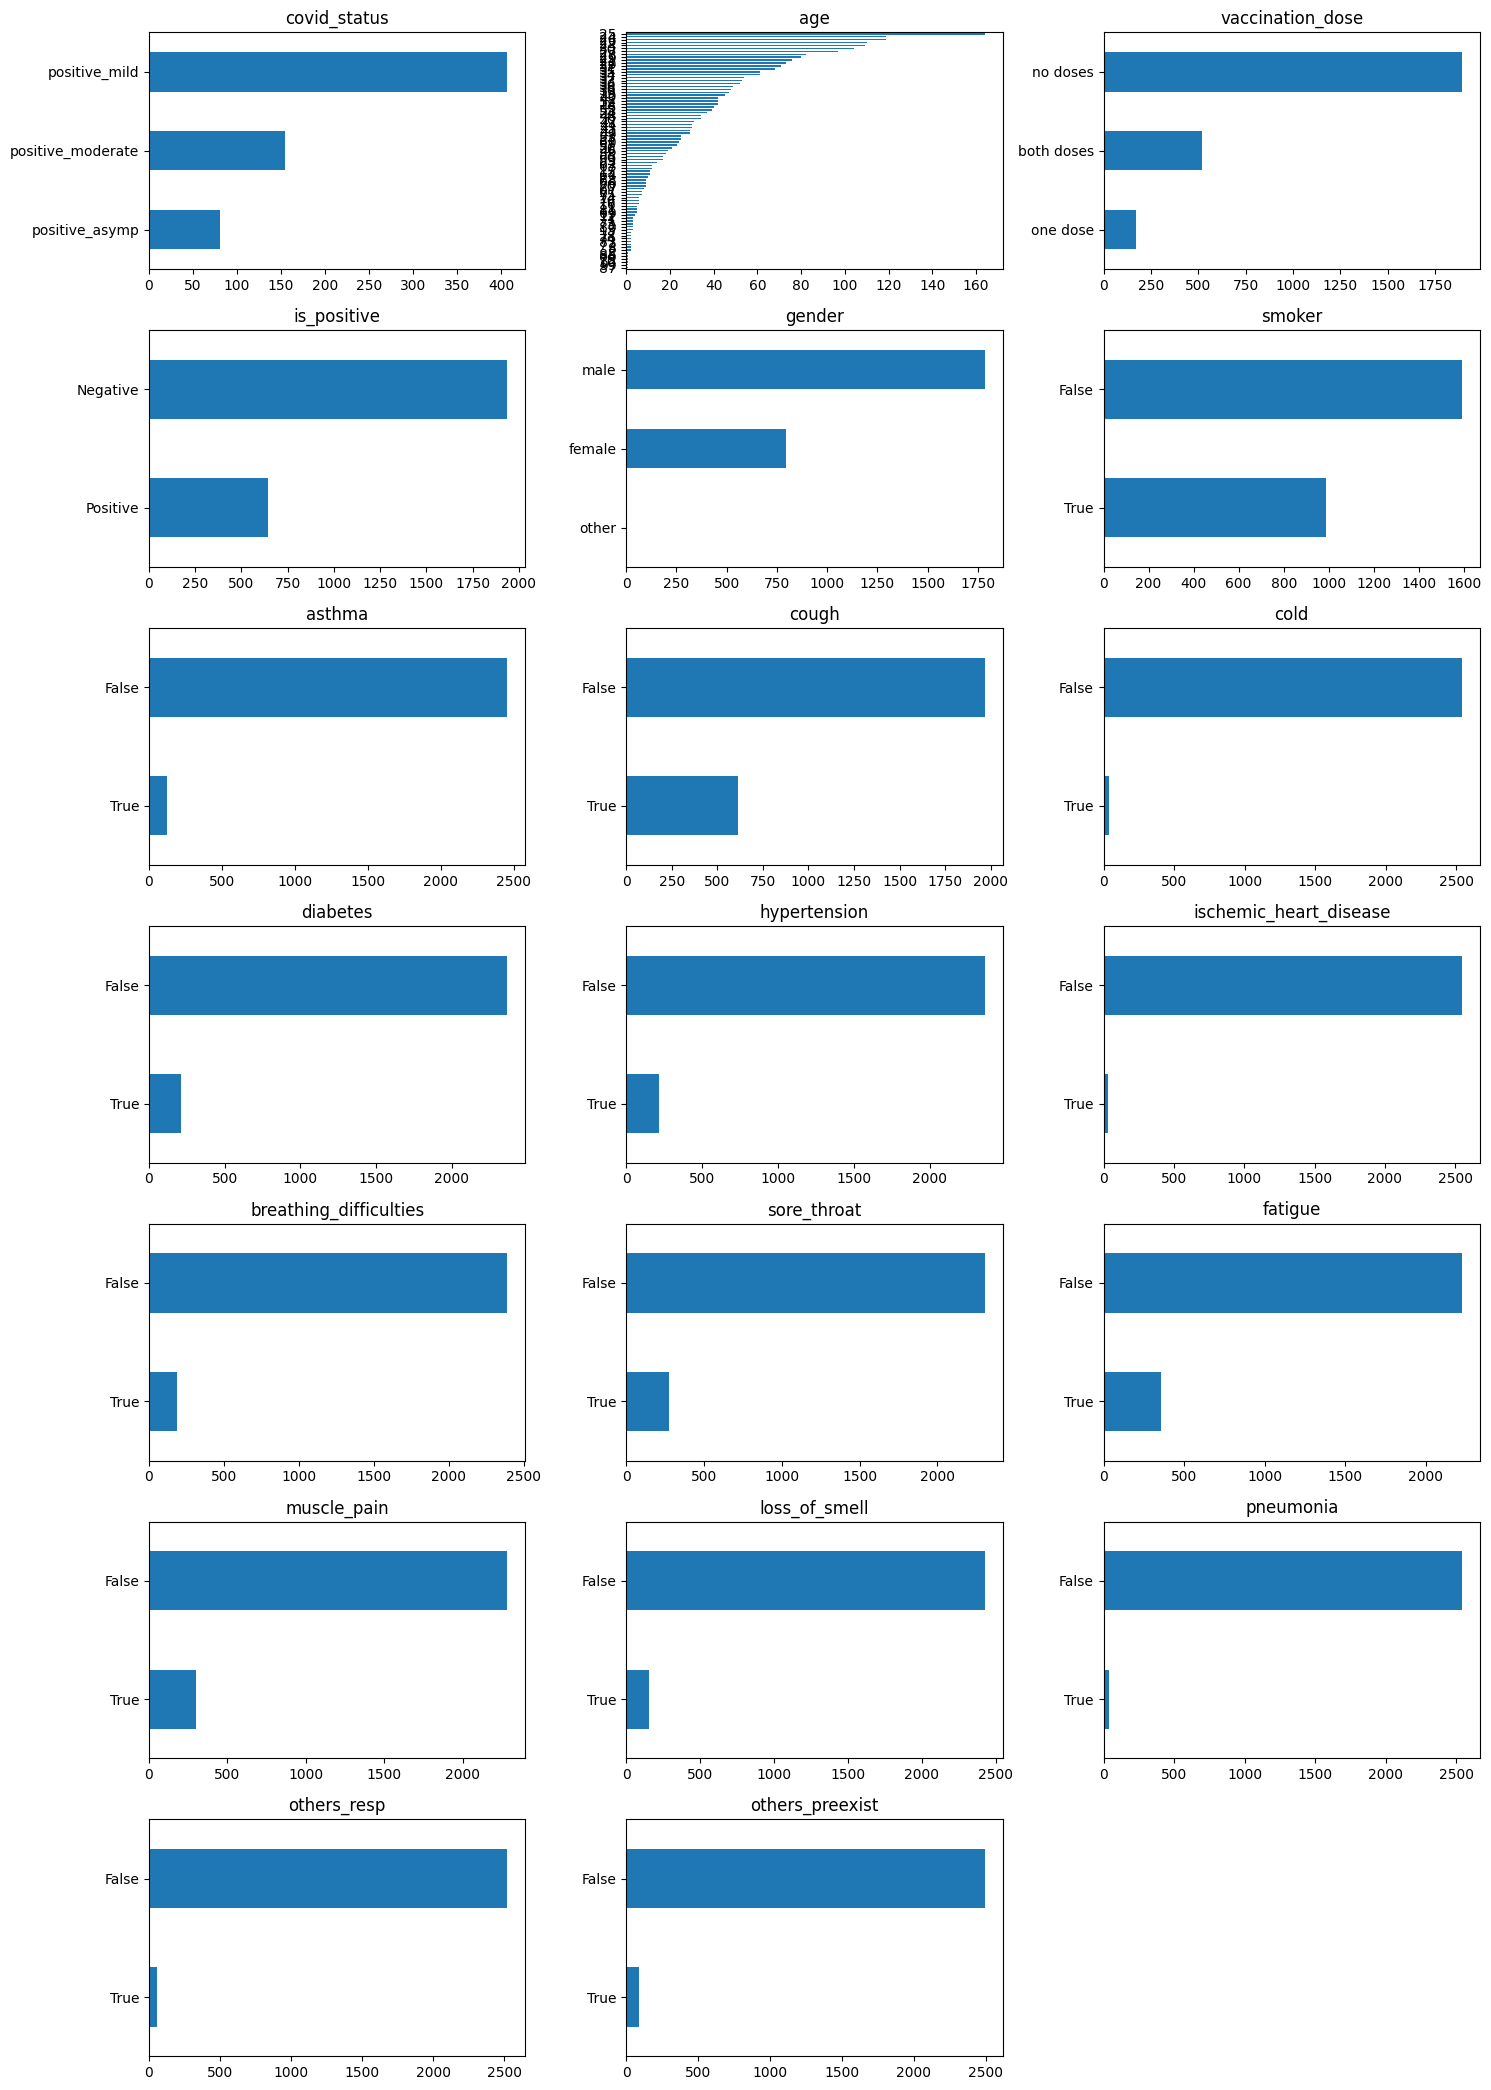

In [3]:

# Define the number of rows and columns in the subplot grid
nrows = (len(df.columns) - 1 - 2) // 3 + 1
ncols = min(len(df.columns) - 2, 3)

# Create the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3))

# Loop over each column and plot its value counts on a horizontal bar chart
for i, col in enumerate(df.columns[2:]):
    ax = axes[i // ncols, i % ncols]
    df[col].value_counts().plot(kind='barh', ax=ax, title=col)
    ax.invert_yaxis()  # Invert the y-axis to show the most common values on top

# Remove any unused subplots
for i in range(len(df.columns) - 2, nrows * ncols):
    fig.delaxes(axes[i // ncols, i % ncols])

# Adjust the layout of the subplots
fig.tight_layout()

C:\Users\Gan Jing Hao\AppData\Local\Temp\ipykernel_24292\486721022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

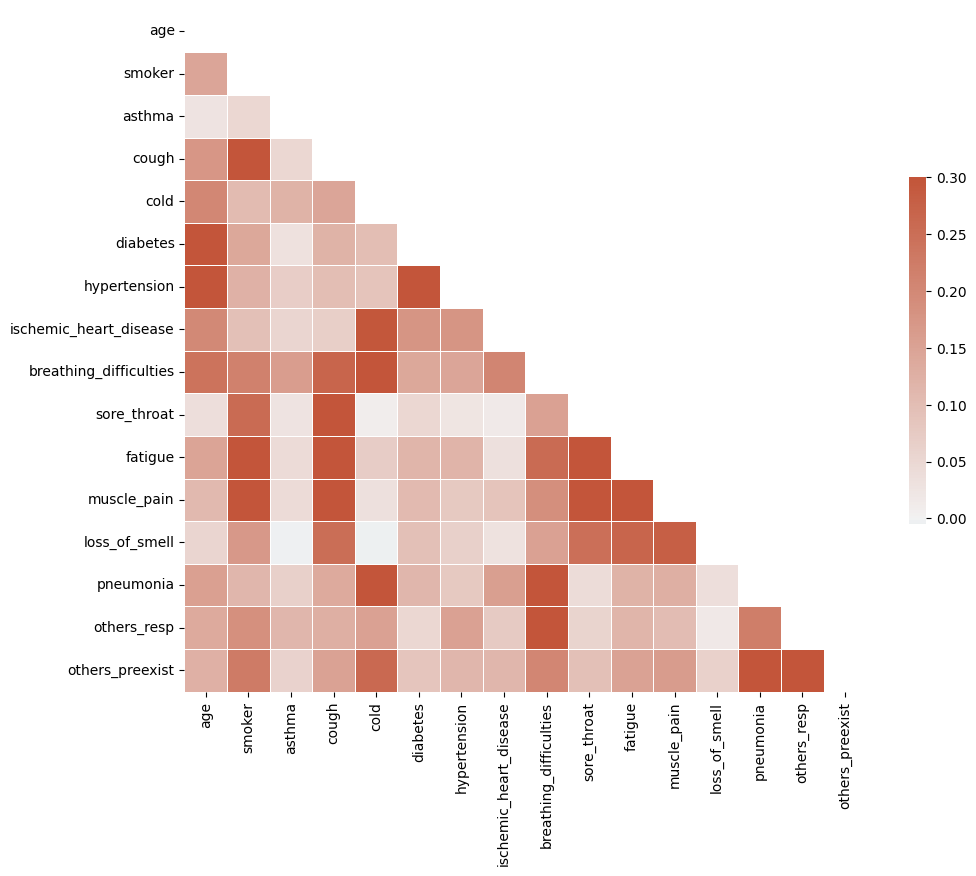

In [4]:
df = df.drop(['date'], axis=1)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [7]:
filename = './Extracted_data/20200415/0KOy96zEUfdMY4rZzwrDT0gMPDa2/breathing-deep.wav'
y, sr = librosa.load(filename,  mono=True)
y, index = librosa.effects.trim(y)


Mel spectrogram shape: (12, 1240)
RMS ENERGY shape: (1, 1240)
Spectral rolloff shape: (1, 1240)
Spectral bandwidth shape: (1, 1240)
Zero crossing rate shape: (1, 1240)
MFCC shape: (12, 1240)
LPC shape: (13,)
Spectral centroid shape: (1, 1240)


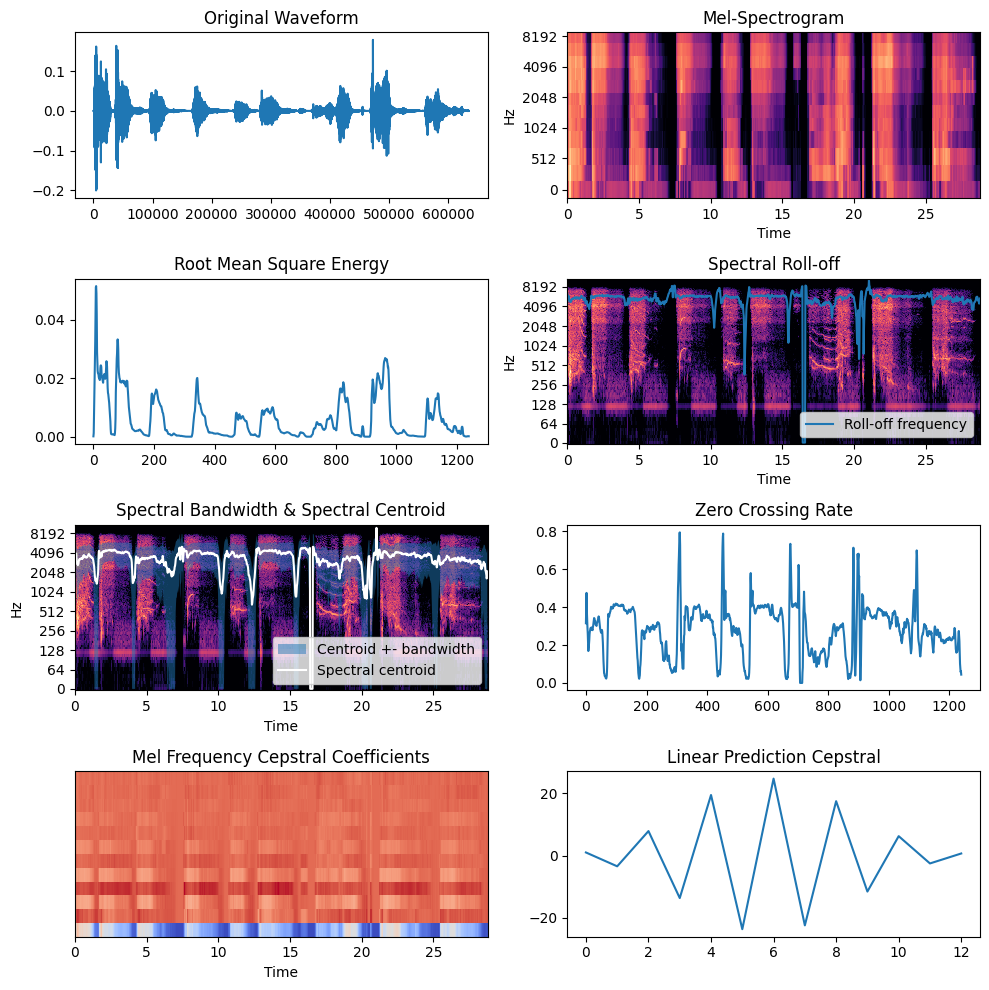

In [8]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=12, fmax=8000)
rms_energy = librosa.feature.rms(y=y)
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)
lpc = librosa.lpc(y=y, order=12)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.times_like(spectral_centroid)
S, phase = librosa.magphase(librosa.stft(y=y))

print('Mel spectrogram shape:', mel_spectrogram.shape)
print('RMS ENERGY shape:', rms_energy.shape)
print('Spectral rolloff shape:', spectral_rolloff.shape)
print('Spectral bandwidth shape:', spectral_bandwidth.shape)
print('Zero crossing rate shape:', zero_crossing_rate.shape)
print('MFCC shape:', mfccs.shape)
print('LPC shape:', lpc.shape)
print('Spectral centroid shape:', spectral_centroid.shape)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

ax[0][0].plot(y)
ax[0][0].set(title='Original Waveform')

librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', ax=ax[0][1])
ax[0][1].set(title='Mel-Spectrogram')


ax[1][0].plot(rms_energy[0])
ax[1][0].set(title='Root Mean Square Energy')

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1][1])
ax[1][1].plot(librosa.times_like(spectral_rolloff), spectral_rolloff[0], label='Roll-off frequency')
ax[1][1].legend(loc='lower right')
ax[1][1].set(title='Spectral Roll-off')

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[2][0])
ax[2][0].set(title='log Power spectrogram')
ax[2][0].fill_between(times, np.maximum(0, spectral_centroid[0] - spectral_bandwidth[0]),
                np.minimum(spectral_centroid[0] + spectral_bandwidth[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[2][0].plot(times, spectral_centroid[0], label='Spectral centroid', color='w')
ax[2][0].legend(loc='lower right')
ax[2][0].set(title='Spectral Bandwidth & Spectral Centroid')



ax[2][1].plot(zero_crossing_rate[0])
ax[2][1].set(title='Zero Crossing Rate')

librosa.display.specshow(mfccs, x_axis='time', ax=ax[3][0])
ax[3][0].set(title='Mel Frequency Cepstral Coefficients')

ax[3][1].plot(lpc)
ax[3][1].set(title='Linear Prediction Cepstral')

plt.tight_layout()
plt.show()



In [ ]:
def extract_feature_statistical_descriptors(x):
    return [np.mean(x), np.std(x), np.min(x), np.max(x), np.median(x)]

In [ ]:
rms_energy_mean, rms_energy_std , rms_energy_min , rms_energy_max, rms_energy_median = extract_feature_statistical_descriptors(rms_energy)
df = pd.DataFrame({
    'rms_energy': extract_feature_statistical_descriptors(rms_energy),
    'spectral_rolloff': extract_feature_statistical_descriptors(spectral_rolloff),
    'spectral_bandwidth': extract_feature_statistical_descriptors(spectral_bandwidth),
    'zero_crossing_rate': extract_feature_statistical_descriptors(zero_crossing_rate),
    'lpc': extract_feature_statistical_descriptors(lpc),
    'spec_cent': extract_feature_statistical_descriptors(spectral_centroid),
}, index=['mean', 'std', 'min', 'max', 'median'])

for i in range(12):
    df['mfccs_{}'.format(i)] = extract_feature_statistical_descriptors(mfccs[i])
for i in range(12):
    df['mel_spectrogram_{}'.format(i)] = extract_feature_statistical_descriptors(mel_spectrogram[i])
# convert DataFrame to json
json_data = df.to_json()
df

,rms_energy,spectral_rolloff,spectral_bandwidth,zero_crossing_rate,lpc,spec_cent,mfccs_0,mfccs_1,mfccs_2,mfccs_3,...,mel_spectrogram_2,mel_spectrogram_3,mel_spectrogram_4,mel_spectrogram_5,mel_spectrogram_6,mel_spectrogram_7,mel_spectrogram_8,mel_spectrogram_9,mel_spectrogram_10,mel_spectrogram_11
mean,0.006637,6469.607892,2328.854135,0.365335,0.064616,3923.314271,-590.474365,8.485265,-0.944503,21.429556,...,3.834449e-03,6.304808e-03,7.931248e-03,2.620313e-03,1.625839e-03,1.064855e-03,1.948401e-03,6.041902e-02,8.772590e-02,1.926218e-02
std,0.014797,402.637463,404.760777,0.105486,2.333586,831.054120,161.713943,18.689074,33.665241,12.757372,...,1.093927e-02,1.826863e-02,3.007419e-02,8.919756e-03,5.650897e-03,4.638456e-03,5.872151e-03,3.346065e-01,4.979924e-01,4.653510e-02
min,0.000034,3908.276367,1261.641116,0.084473,-3.602978,1859.009621,-721.576233,-56.810108,-100.785057,-5.740298,...,1.239889e-08,5.801503e-09,5.172791e-09,3.940024e-09,5.456210e-09,5.027349e-09,1.120542e-09,1.123449e-09,6.401918e-10,7.550465e-10
max,0.117568,7192.089844,2922.097934,0.586426,3.411759,5896.473315,-235.383926,125.552689,40.875923,76.951797,...,1.256156e-01,1.626402e-01,3.301378e-01,8.333997e-02,8.315118e-02,4.929821e-02,5.485059e-02,4.195535e+00,6.372547e+00,3.650657e-01
median,0.000148,6524.560547,2532.041346,0.364258,0.302540,3874.612205,-691.441101,14.157556,15.880682,17.380600,...,3.982727e-07,6.488275e-07,4.310451e-07,2.357121e-07,4.347234e-07,4.137375e-07,2.982951e-07,2.164369e-06,1.405136e-06,1.834477e-06


In [ ]:
def extract_audio_feature(audio_path, audio_name):
    y, sr = librosa.load(filename,  mono=True)
    ## remove silence
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=12, fmax=8000)
    rms_energy = librosa.feature.rms(y=y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)
    lpc = librosa.lpc(y=y, order=12)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    feature_names = ['rms_energy', 'spectral_rolloff', 'spectral_bandwidth', 'zero_crossing_rate', 'lpc', 'spectral_centroid']
    statistic_descriptors = ['mean', 'std', 'min', 'max', 'median']
    columns = []
    data = {}
    Features = [
                ("rms_energy", rms_energy), ("spectral_rolloff", spectral_rolloff), ("spectral_bandwidth", spectral_bandwidth),
                ("zero_crossing_rate", zero_crossing_rate), ("lpc", lpc), ("spectral_centroid", spectral_centroid)
            ]

    for feature_name in feature_names:
        for statistic_descriptor in statistic_descriptors:
            columns.append(f'{audio_name}_{feature_name}_{statistic_descriptor}')


    df = pd.DataFrame(columns=columns)

    for feature_name, feature in Features:
        mean_data, std_data, min_data, max_data, median_data = extract_feature_statistical_descriptors(feature)
        data[f"{audio_name}_{feature_name}_mean"] = mean_data
        data[f"{audio_name}_{feature_name}_std"] = std_data
        data[f"{audio_name}_{feature_name}_min"] = min_data
        data[f"{audio_name}_{feature_name}_max"] = max_data
        data[f"{audio_name}_{feature_name}_median"] = median_data
    for i in range(0, len(mel_spectrogram)):
        mean_data, std_data, min_data, max_data, median_data = extract_feature_statistical_descriptors(mel_spectrogram[i])
        print(i, mean_data, std_data, min_data, max_data, median_data)
        data[f"{audio_name}_mel_spectrogram_{i + 1}_mean"] = mean_data
        data[f"{audio_name}_mel_spectrogram_{i + 1}_std"] = std_data
        data[f"{audio_name}_mel_spectrogram_{i + 1}_min"] = min_data
        data[f"{audio_name}_mel_spectrogram_{i + 1}_max"] = max_data
        data[f"{audio_name}_mel_spectrogram_{i + 1}_median"] = median_data
    for i in range(0, len(mfccs)):
        mean_data, std_data, min_data, max_data, median_data = extract_feature_statistical_descriptors(mfccs[i])
        data[f"{audio_name}_mfccs_{i + 1}_mean"] = mean_data
        data[f"{audio_name}_mfccs_{i + 1}_std"] = std_data
        data[f"{audio_name}_mfccs_{i + 1}_min"] = min_data
        data[f"{audio_name}_mfccs_{i + 1}_max"] = max_data
        data[f"{audio_name}_mfccs_{i + 1}_median"] = median_data    
    df = df.append(data, ignore_index=True)

    json_data = df.to_json()

    with open(f'{audio_name}.json', 'w') as f:
        json.dump(json_data, f)
    return df

In [ ]:
filename = './Extracted_data/20200413/yTldbEFYIkOvoaY6f0elulpdzxQ2/breathing-deep.wav'
df_features_statistic = extract_audio_feature(filename, 'breathing-deep')
df_features_statistic

0 0.005133923 0.05558157 8.394662e-07 0.9904748 1.4739751e-05
1 0.0024239686 0.028890897 7.453669e-08 0.69588363 1.7778739e-06
2 0.0038344495 0.01093927 1.2398891e-08 0.12561563 3.9827268e-07
3 0.0063048084 0.018268632 5.801503e-09 0.16264017 6.488275e-07
4 0.007931248 0.030074192 5.1727906e-09 0.33013776 4.3104512e-07
5 0.002620313 0.008919756 3.9400243e-09 0.083339974 2.3571208e-07
6 0.0016258386 0.005650897 5.4562097e-09 0.08315118 4.347234e-07
7 0.0010648553 0.004638456 5.0273488e-09 0.049298212 4.1373747e-07
8 0.0019484013 0.0058721513 1.120542e-09 0.054850586 2.982951e-07
9 0.060419023 0.33460647 1.1234486e-09 4.195535 2.1643693e-06
10 0.0877259 0.4979924 6.401918e-10 6.3725467 1.4051363e-06
11 0.019262178 0.046535097 7.550465e-10 0.3650657 1.8344772e-06


C:\Users\Gan Jing Hao\AppData\Local\Temp\ipykernel_11328\2464133214.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)


,breathing-deep_rms_energy_mean,breathing-deep_rms_energy_std,breathing-deep_rms_energy_min,breathing-deep_rms_energy_max,breathing-deep_rms_energy_median,breathing-deep_spectral_rolloff_mean,breathing-deep_spectral_rolloff_std,breathing-deep_spectral_rolloff_min,breathing-deep_spectral_rolloff_max,breathing-deep_spectral_rolloff_median,...,breathing-deep_mfccs_11_mean,breathing-deep_mfccs_11_std,breathing-deep_mfccs_11_min,breathing-deep_mfccs_11_max,breathing-deep_mfccs_11_median,breathing-deep_mfccs_12_mean,breathing-deep_mfccs_12_std,breathing-deep_mfccs_12_min,breathing-deep_mfccs_12_max,breathing-deep_mfccs_12_median
0,0.006637,0.014797,0.000034,0.117568,0.000148,6469.607892,402.637463,3908.276367,7192.089844,6524.560547,...,-5.380126,6.659143,-34.385529,24.476349,-5.011881,-2.919098,7.134286,-35.060581,22.390579,-3.111777
